In [ ]:
# from desc import set_device
# set_device("gpu")

In [2]:
from desc.io import load
from desc.coils import MixedCoilSet,CoilSet
# from desc.calc_BNORM_from_coilset import calc_BNORM_from_coilset
# from desc.field_line_tracing_DESC_from_coilset import field_trace_from_coilset
import numpy as np
from desc.magnetic_fields import field_line_integrate

/home/dpanici/DESC/desc/io/hdf5_io.py:125: RuntimeWarning: Save attribute '_rho' was not loaded.
  warnings.warn(
/home/dpanici/DESC/desc/io/hdf5_io.py:125: RuntimeWarning: Save attribute '_shift' was not loaded.
  warnings.warn(
/home/dpanici/DESC/desc/io/hdf5_io.py:125: RuntimeWarning: Save attribute '_rotmat' was not loaded.
  warnings.warn(


(<Figure size 288x288 with 1 Axes>,
 <Axes: xlabel='$\\rho$', ylabel='$ \\iota ~(~)$'>)

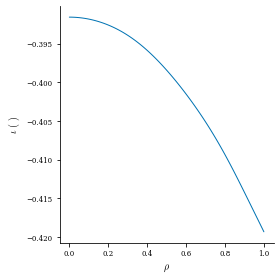

In [3]:
eq = load( "isl_curr_dens_output.h5")
from desc.plotting import *
plot_1d(eq,"iota")


In [4]:
from desc.grid import LinearGrid
data = eq.compute("iota",grid=LinearGrid(rho=np.linspace(0.552,0.553,200),theta=0,zeta=0))
ind=np.argmin(np.abs(data["iota"]+0.4))
rho = data["rho"][ind]
print(rho)

0.5525728643216081


In [5]:
eqname = "isl_curr_dens_output.h5"
coilfile = "Giuliani.is.free.0403.3.00050.coils"
coils = MixedCoilSet.from_makegrid_coilfile(coilfile)
c_four = coils.to_FourierXYZ(N=100)


In [6]:
coils = CoilSet(*c_four)

/home/dpanici/DESC/desc/io/hdf5_io.py:125: RuntimeWarning: Save attribute '_rho' was not loaded.
  warnings.warn(
/home/dpanici/DESC/desc/io/hdf5_io.py:125: RuntimeWarning: Save attribute '_shift' was not loaded.
  warnings.warn(
/home/dpanici/DESC/desc/io/hdf5_io.py:125: RuntimeWarning: Save attribute '_rotmat' was not loaded.
  warnings.warn(
/home/dpanici/DESC/desc/io/hdf5_io.py:125: RuntimeWarning: Save attribute '_anisotropy' was not loaded.
  warnings.warn(


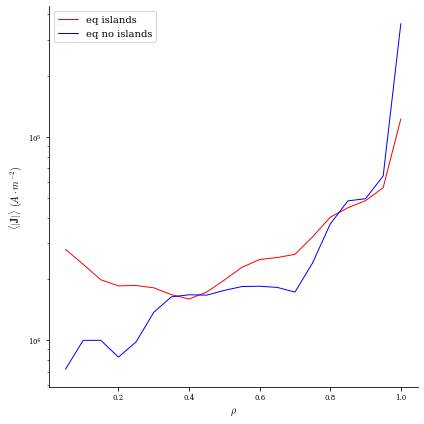

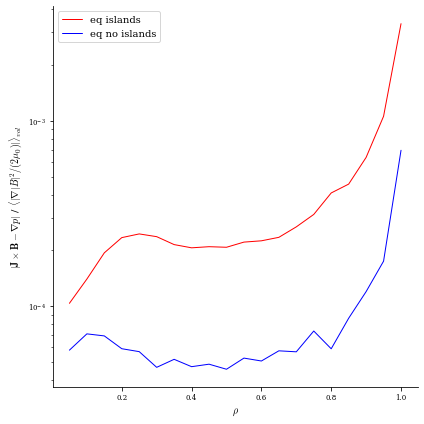

In [7]:
from desc.plotting import *
# plot_coils(c_four)
import matplotlib.pyplot as plt
# plt.rcParams.update({"font.size":24})
eq_isl = load(eqname)
eq_noisl = load("../input.vmec_no_islands_AR6_desc_warmstart_output.h5")[-1]
fig,ax = plot_fsa(eq_isl,"|J|",log=True,linecolor="r",label="eq islands",figsize=(6,6))
fig,ax = plot_fsa(eq_noisl,"|J|",log=True,linecolor="b",label="eq no islands",ax=ax)
ax.legend()

fig,ax = plot_fsa(eq_isl,"|F|",log=True,norm_F=True,linecolor="r",label="eq islands",figsize=(6,6))
fig,ax = plot_fsa(eq_noisl,"|F|",log=True,norm_F=True,linecolor="b",label="eq no islands",ax=ax)
ax.legend()

(<Figure size 288x288 with 1 Axes>,
 <Axes: xlabel='$\\rho$', ylabel='$ \\iota ~(~)$'>)

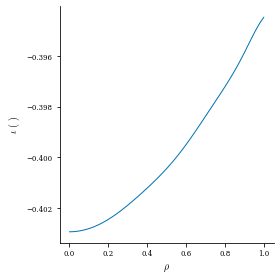

In [8]:
plot_1d(eq_noisl,"iota")


In [9]:
eq

Equilibrium at 0x1531e469af50 (L=16, M=16, N=16, NFP=2.0, sym=1, spectral_indexing=ansi)

In [10]:
data = eq_noisl.compute("iota",grid=LinearGrid(rho=np.linspace(0.5,0.56,400),theta=0,zeta=0))
ind=np.argmin(np.abs(data["iota"]+0.4))
rho = data["rho"][ind]
print(rho)

0.5497744360902256


In [171]:
nturns = 100  # how many turns
nplanes = 6  # how many places within 1 field period do we want output

rho=0.52
# for starting locations we'll pick positions on flux surfaces on the outboard midplane
grid = LinearGrid(rho=np.linspace(0.52,0.6,15))
grid = LinearGrid(rho=np.array([0.52,0.56]), theta=np.pi)
grid = LinearGrid(rho=np.array([0.56]), theta=np.pi)

r0 = eq.compute("R", grid=grid)["R"]
z0 = eq.compute("Z", grid=grid)["Z"]
phis = (
    np.linspace(0, 2 * np.pi / eq.NFP, nplanes, endpoint=False)
    + np.arange(0, nturns)[:, None] * 2 * np.pi / eq.NFP
).flatten()




In [172]:
# coils_spl = MixedCoilSet.from_makegrid_coilfile(coilfile)


In [173]:
import time
t0=time.time()

rs, zs = field_line_integrate(r0, z0, phis, coils)
print(f"took {time.time()-t0} seconds")


took 13.329657793045044 seconds


In [174]:
zs = zs.reshape((nturns, nplanes, -1))
rs = rs.reshape((nturns, nplanes, -1))

# if eq.Psi < 0 or np.any(eq.compute("iota")["iota"] <0):  # field lines are traced backwards when toroidal field < 0
#     rs, zs = rs[:, :: int(np.sign(eq.Psi))], zs[:, :: int(np.sign(eq.Psi))]
#     rs, zs = np.roll(rs, 1, 1), np.roll(zs, 1, 1)

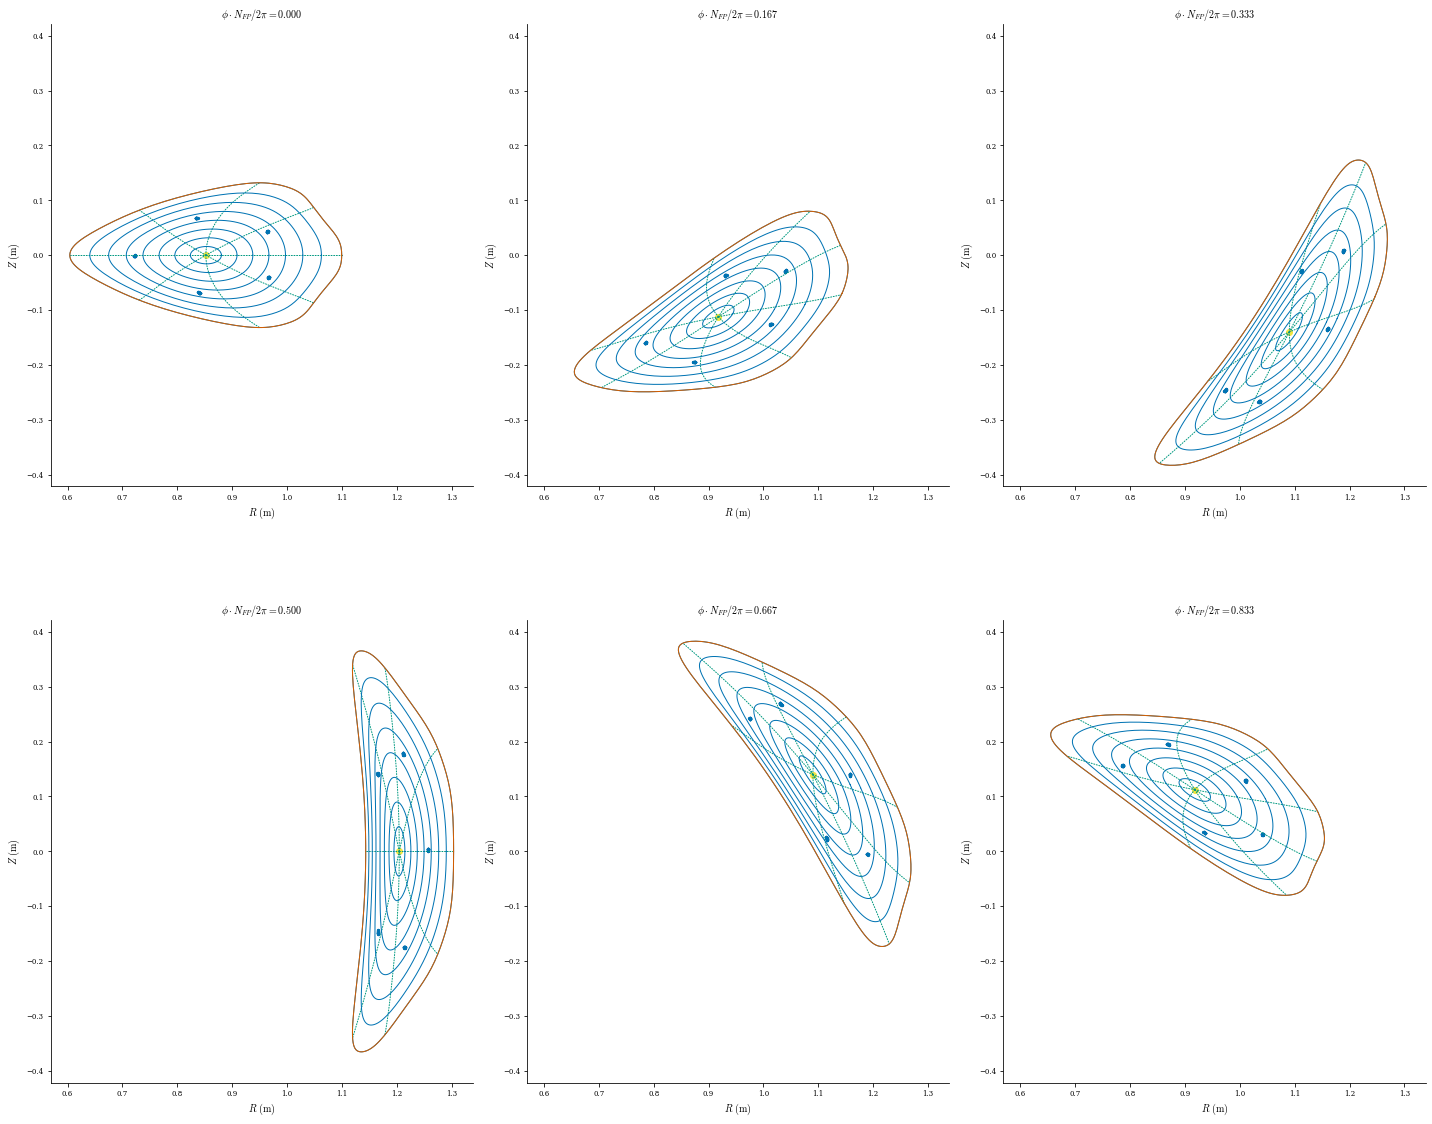

In [175]:
from desc.plotting import *
fig, ax = plot_surfaces(eq,figsize=(20,20))
ax = ax.flatten()
# for i in range(nplanes):
i=0
ax[i].scatter(rs[:, i, :], zs[:, i, :], s=5)
for i,j in zip([5,4,3,2,1],[1,2,3,4,5]):
    ax[i].scatter(rs[:, j, :], zs[:, j, :], s=5)

In [126]:
# np.save(f"rs_rho_0.48.npy",rs)
# np.save(f"zs_rho_0.48.npy",rs)


(500, 6, 1)

In [176]:
nturns = 500  # how many turns
nplanes = 24  # how many places within 1 field period do we want output

rho=0.52
# for starting locations we'll pick positions on flux surfaces on the outboard midplane
grid = LinearGrid(rho=np.linspace(0.52,0.6,15))
grid = LinearGrid(rho=np.array([0.52,0.56]), theta=np.pi)
grid = LinearGrid(rho=np.array([0.56]), theta=np.pi)

r0 = eq.compute("R", grid=grid)["R"]
z0 = eq.compute("Z", grid=grid)["Z"]
phis = (
    np.linspace(0, 2 * np.pi / eq.NFP, nplanes, endpoint=False)
    + np.arange(0, nturns)[:, None] * 2 * np.pi / eq.NFP
).flatten()




In [177]:
import time
t0=time.time()

rs, zs = field_line_integrate(r0, z0, phis, coils)
print(f"took {time.time()-t0} seconds")


took 60.84567856788635 seconds


In [178]:
zs = zs.reshape((nturns, nplanes, -1))
rs = rs.reshape((nturns, nplanes, -1))
phis = phis.reshape((nturns, nplanes, -1))

In [179]:
# np.save(f"rs_rho_0.48.npy",rs)
# np.save(f"zs_rho_0.48.npy",zs)
# np.save(f"phis_rho_0.48.npy",phis)

np.save(f"rs_rho_0.56_axis.npy",rs)
np.save(f"zs_rho_0.56_axis.npy",zs)
np.save(f"phis_rho_0.56_axis.npy",phis)



/home/dpanici/DESC/desc/utils.py:493: FutureWarning: argument zeta has been renamed to phi, zeta will be removed in a future release
  warnings.warn(
/home/dpanici/DESC/desc/utils.py:493: FutureWarning: argument zeta has been renamed to phi, zeta will be removed in a future release
  warnings.warn(


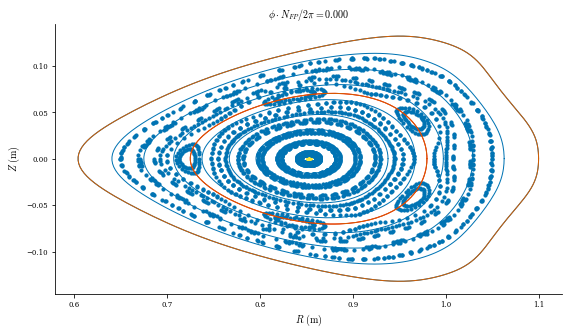

In [15]:
# import matplotlib.pyplot as plt
# eq = eq_isl
# fig,ax=plot_surfaces(eq,theta=0,zeta=np.array(0.0),figsize=(8,8))
# fig,ax=plot_surfaces(eq,theta=0,zeta=np.array(0.0),rho=np.array(0.5525),figsize=(8,8),rho_color="r",ax=ax)

# ax[0].scatter(coil_trace_R,coil_trace_Z,s=10)

In [11]:
from desc.grid import LinearGrid
MN=450
grid = LinearGrid(rho=np.array(1.0),M=MN,N=MN)
data = eq.compute(["n_rho","B","e_theta","e_zeta"],grid=grid)
data_surf = eq.surface.compute("x",grid=grid)

/home/dpanici/DESC/desc/transform.py:69: UserWarning: Unequal number of field periods for grid 1 and basis 2.0.
  warnings.warn(
/home/dpanici/DESC/desc/transform.py:69: UserWarning: Unequal number of field periods for grid 1 and basis 2.0.
  warnings.warn(
/home/dpanici/DESC/desc/transform.py:69: UserWarning: Unequal number of field periods for grid 1 and basis 2.0.
  warnings.warn(
/home/dpanici/DESC/desc/transform.py:69: UserWarning: Unequal number of field periods for grid 1 and basis 2.0.
  warnings.warn(
/home/dpanici/DESC/desc/transform.py:69: UserWarning: Unequal number of field periods for grid 1 and basis 2.0.
  warnings.warn(


In [12]:
from desc.compute.utils import cross
import numpy as np
K = -cross(data["n_rho"],data["B"],axis=1) / (4*np.pi * 1e-7)

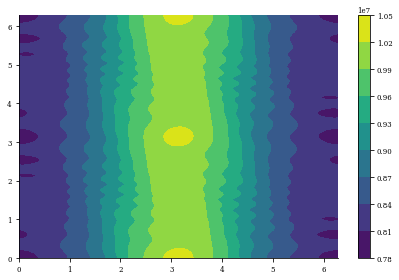

In [13]:
plt.figure()
K_mag = np.linalg.norm(K,axis=1)
t = grid.nodes[:,1].reshape(grid.num_zeta,grid.num_theta)
z = grid.nodes[:,2].reshape(grid.num_zeta,grid.num_theta)
plt.contourf(t,z,K_mag.reshape(grid.num_zeta,grid.num_theta))
plt.colorbar()

In [14]:
import jax
@jax.jit
def biot_loop(re, rs, J, dV):
    """
    Parameters
    ----------
    re : ndarray, shape(n_eval_pts, 3)
        evaluation points
    rs : ndarray, shape(n_src_pts, 3)
        source points
    J : ndarray, shape(n_src_pts, 3)
        current density vector at source points
    dV : ndarray, shape(n_src_pts)
        volume element at source points
    """
    re, rs, J, dV = map(jnp.asarray, (re, rs, J, dV))
    assert J.shape == rs.shape
    JdV = J * dV[:, None]
    B = jnp.zeros_like(re)

    def body(i, B):
        r = re - rs[i, :]
        num = jnp.cross(JdV[i, :], r, axis=-1)
        den = jnp.linalg.norm(r, axis=-1) ** 3
        B = B + jnp.where(den[:, None] == 0, 0, num / den[:, None])
        return B

    return 1e-7 * jax.lax.fori_loop(0, J.shape[0], body, B)

In [15]:
from desc.backend import jnp
rs = data_surf["x"]
def B_from_K_trace(re, params=None, basis="rpz",grid=grid):
    dV = grid.weights * jnp.linalg.norm(
        jnp.cross(data["e_theta"], data["e_zeta"], axis=-1), axis=-1
    )
    B = biot_loop(
        rpz2xyz(re), rpz2xyz(rs), rpz2xyz_vec(K, phi=grid.nodes[:, 2]), dV
    )
    return xyz2rpz_vec(B, phi=re[:, 1])



In [16]:
from desc.compute import rpz2xyz, rpz2xyz_vec, xyz2rpz_vec

from desc.magnetic_fields import field_line_integrate, ToroidalMagneticField, SplineMagneticField

In [17]:
import os
if os.path.exists(f"isl_curr_dens_spline_field_knots_120_MN{MN}.h5"):
    print("field loaded")
    field = load(f"isl_curr_dens_spline_field_knots_120_MN{MN}.h5")
else:
    R = np.linspace(0.52, 1.35, 120) # 140
    Z = np.linspace(-0.45, 0.45, 120) # 140
    phi = np.linspace(0, 2 * np.pi / 2, 120) # 120

    Bfield = ToroidalMagneticField(1,1)
    Bfield.compute_magnetic_field = B_from_K_trace

    field = SplineMagneticField.from_field(
        Bfield, R, phi, Z, extrap=False, period=2 * np.pi / 2
    )
    field.save(f"isl_curr_dens_spline_field_knots_120_MN{MN}.h5")

field loaded


In [18]:
ntransit=100

phis = np.arange(0, ntransit * 2 * np.pi, 2 * np.pi)
# n_R_points = 15
# rrr = np.linspace(0.65,1.05,n_R_points) # initial R positions of field-lines to trace
# set initial Z positions to zero

# integrate field lines
import time
t1 = time.time()

# just use Bfield if want directly from the surface current

field_R, field_Z = field_line_integrate(rrr, np.zeros_like(rrr), phis, field,grid=grid)
print(f"took {time.time() - t1} seconds")

took 200.9318733215332 seconds


/home/dpanici/DESC/desc/utils.py:493: FutureWarning: argument zeta has been renamed to phi, zeta will be removed in a future release
  warnings.warn(


(-0.2, 0.2)

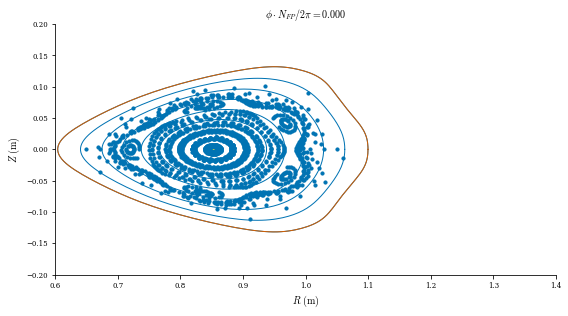

In [19]:
import matplotlib.pyplot as plt
fig,ax=plot_surfaces(eq,theta=0,zeta=np.array(0.0),figsize=(8,8))
ax[0].scatter(field_R,field_Z,s=10)
ax[0].set_xlim([0.6,1.4])
ax[0].set_ylim([-0.2,0.2])


/home/dpanici/DESC/desc/utils.py:493: FutureWarning: argument zeta has been renamed to phi, zeta will be removed in a future release
  warnings.warn(


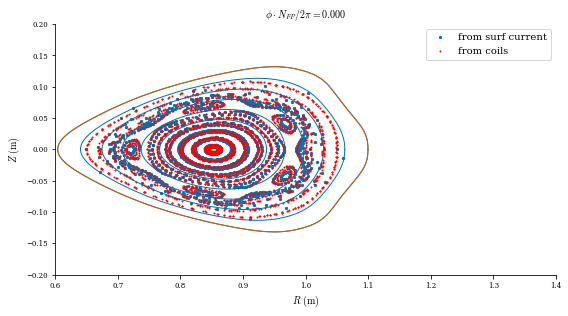

In [24]:
import matplotlib.pyplot as plt
fig,ax=plot_surfaces(eq,theta=0,zeta=np.array(0.0),figsize=(8,8))
ax[0].scatter(field_R,field_Z,s=5,label="from surf current")
ax[0].scatter(coil_trace_R,coil_trace_Z,s=1,label="from coils",c="r")



ax[0].set_xlim([0.6,1.4])
ax[0].set_ylim([-0.2,0.2])
ax[0].legend()